# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

Comparing the empirical CDF with the theoretical CDF using mean, variance of the given dataset:

In [4]:
import matplotlib.pyplot as plt

In [5]:
def ecdf(dataset):
    # compute ecdf for a single array
    # x for ecdf (x = quantity being measured)
    x = np.sort(dataset)
    
    # y for ecdf (y = fraction of values that have a value smaller than the x value)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y
    
dataset_x, dataset_y = ecdf(df['temperature'])

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
size = len(df['temperature'])


In [6]:
# generate normal distribution with mean, std, size of the sample dataset
normal_x, normal_y = ecdf(np.random.normal(mean, std, size))

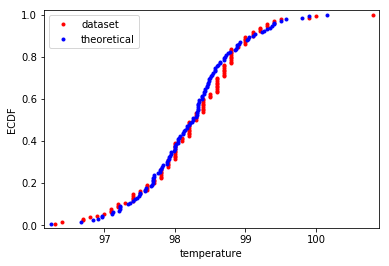

In [7]:
# plots lines connecting data points if marker and linestyle aren't used
plt.plot(dataset_x, dataset_y, marker = '.', linestyle = 'none', color = 'red') 
plt.plot(normal_x, normal_y, marker = '.', linestyle = 'none', color = 'blue') 

plt.xlabel('temperature')
plt.ylabel('ECDF')
plt.legend(('dataset', 'theoretical'), loc = 'upper left')
    
plt.margins(0.02) # keeps data off plot edges
plt.show()

The red plot reflects the CDF of the body temperatures from the given dataset, and the blue plot reflects a normal distribution with the same mean and standard deviation as the dataset. Since the red plot approximately follows a normal distribution, it can be concluded that the given body temperature dataset is normal. 

### 2. Is the sample size large? Are the observations independent?

In [8]:
print('Sample size: ', len(df['temperature']))

Sample size:  130


In [9]:
# 95% confidence level
print("Necessary Sample Size = ((Z-score)^2 * StdDev *(1-StdDev)) / (margin of error)^2 = ", 
      (float((1.96)**2 * std * (1-std)) / (.05)**2))

Necessary Sample Size = ((Z-score)^2 * StdDev *(1-StdDev)) / (margin of error)^2 =  302.618649707999


The sample size is small with just 130 samples and around 303 samples would be considered large enough. The observations are independent since the body temperature of one person does not affect/influence the body temperature of another. 

### 3. Is the true population mean really 98.6 degrees F?

In this case, 98.6 is the population (theoretical) mean. With the sample that is available to test the hypothesis, a one sample t-test can be used. We use a t-test instead of a z-test because we do not know the population standard deviation. 

H0: There is no significant difference between the population mean and the sample mean

H1: There is a significant difference between the population and sample means

In [10]:
pop_mean = 98.6
sample_mean = np.mean(df['temperature'])

# bootstrap resampling
trials = 1000
test_mean_lst = np.empty(trials)

for i in range(trials):
    test_mean_lst[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))


In [11]:
from scipy import stats
stats.ttest_1samp(test_mean_lst, pop_mean)

Ttest_1sampResult(statistic=-180.86859947163927, pvalue=0.0)

In [12]:
# compute z-score for the difference
def z_score(data_lst, sample):
    return (sample - np.mean(data_lst))/float(np.std(data_lst))

print(z_score(test_mean_lst, pop_mean))

5.72242924564


Since the t-statistic is large (>0.05), there is strong evidence to reject the null hypothesis and this is evident from the z-score results as well. Hence it can be concluded that the dataset does not represent the population mean well.

### 4. Draw a small sample of size 10 from the data and repeat both tests.

In [13]:
trial2 = 10
test_mean_lst2 = np.empty(trial2)

for i in range(trial2):
    test_mean_lst2[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))
test_mean_lst2

array([ 98.28615385,  98.26153846,  98.19153846,  98.4       ,
        98.20538462,  98.26692308,  98.24384615,  98.28615385,
        98.32307692,  98.34461538])

In [14]:
print(z_score(test_mean_lst2, pop_mean), stats.ttest_1samp(test_mean_lst, pop_mean))

5.33951178948 Ttest_1sampResult(statistic=-180.86859947163927, pvalue=0.0)


With the z score continuing to be high, it shows evidence against the null hypothesis. The end decision with using the t-table vs. the z-table are the same, though the values differ slightly.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [15]:
# bootstrap from dataset, get confidence interval of 95%
# get means from the bootstrapped samples

trials3 = 1000
test_mean_lst3 = np.empty(trials3)

for i in range(trials3):
    test_mean_lst3[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))

In [16]:
def summarize_dist(sample_stats):
    print('Sample std dev: ', sample_stats.std())
    print('95% confidence interval: ', np.percentile(sample_stats, [2.5, 97.5]))
    print('Sample mean: ', sample_stats.mean())

In [17]:
summarize_dist(test_mean_lst3)

Sample std dev:  0.067117474757
95% confidence interval:  [ 98.10834615  98.37538462]
Sample mean:  98.2486061538


In [18]:
# margin of error = z * std error of sample
# margin of error at 95% = 1.645* sd/sqrt(n)

print('margin of error: ', 1.96 * 0.066/np.sqrt(1000))

margin of error:  0.00409072238119


With sample mean of 98.24, a confidence interval of 95% returns a margin of error of 0.004, meaning it can be said with 95% certainty that the actual population mean is between +/- 0.004 of the sample mean 98.24

With a confidence interval of 98.11536538 and 98.36851923, it can be stated that body temperature above 98.37 and below 98.12 is considered abnormal.

### 6. Is there a significant difference between males and females in normal temperature?

Steps:

    1) bootstrap to resample male/female body temperatures
    
    2) H0: there is no significant difference in mean body temperatures of men and women
    
    H1: there is a significant difference in mean body temperatures of men and women

In [19]:
men_temp = df[df['gender']=='M']['temperature']
women_temp = df[df['gender']=='F']['temperature']

In [20]:
np.random.choice(men_temp)

98.599999999999994

In [21]:
trials = 1000
men_temp_means, women_temp_means = np.empty(trials), np.empty(trials)

for i in range(trials):
    men_temp_means[i] = np.mean(np.random.choice(men_temp, len(men_temp)))
    women_temp_means[i] = np.mean(np.random.choice(women_temp,len(women_temp)))

In [22]:
#subtract the two means and see if 0 is included in the confidence interval
total_mean = men_temp_means - women_temp_means
print(np.percentile(total_mean, [5, 95]))

[-0.50007692 -0.08576923]


Since 0 is not part of the confidence interval, we can reject the null hypothesis at the 95% confidence interval